# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
_sd = pd.read_csv("sonar data.csv",header=None)
_sd

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
_sd.shape

(208, 61)

In [4]:
_sd.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# Data Preprocessing

0     0
31    0
33    0
34    0
35    0
     ..
25    0
26    0
27    0
28    0
60    0
Length: 61, dtype: int64

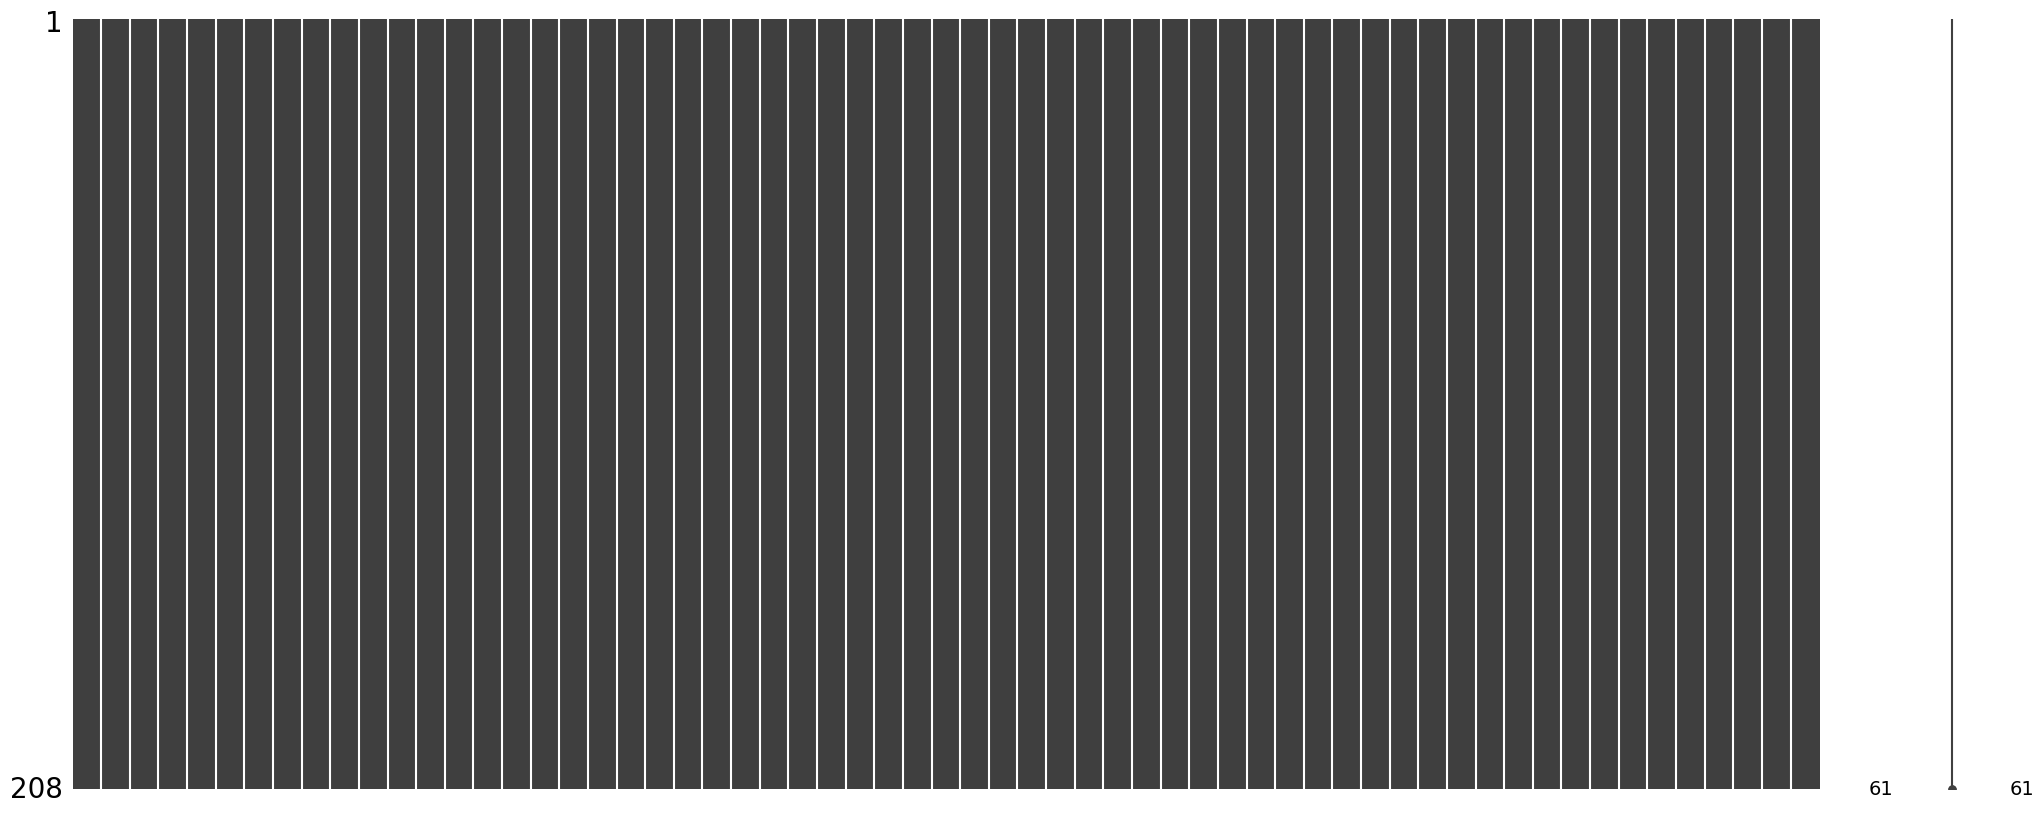

In [5]:
msno.matrix(_sd)
_sd.isnull().sum().sort_values(ascending=False)

In [6]:
#Transforming Binary labels
le = LabelEncoder()
_sd[60] = le.fit_transform(_sd[60])

In [7]:
_sd

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [8]:
_sd[60].value_counts()

60
0    111
1     97
Name: count, dtype: int64

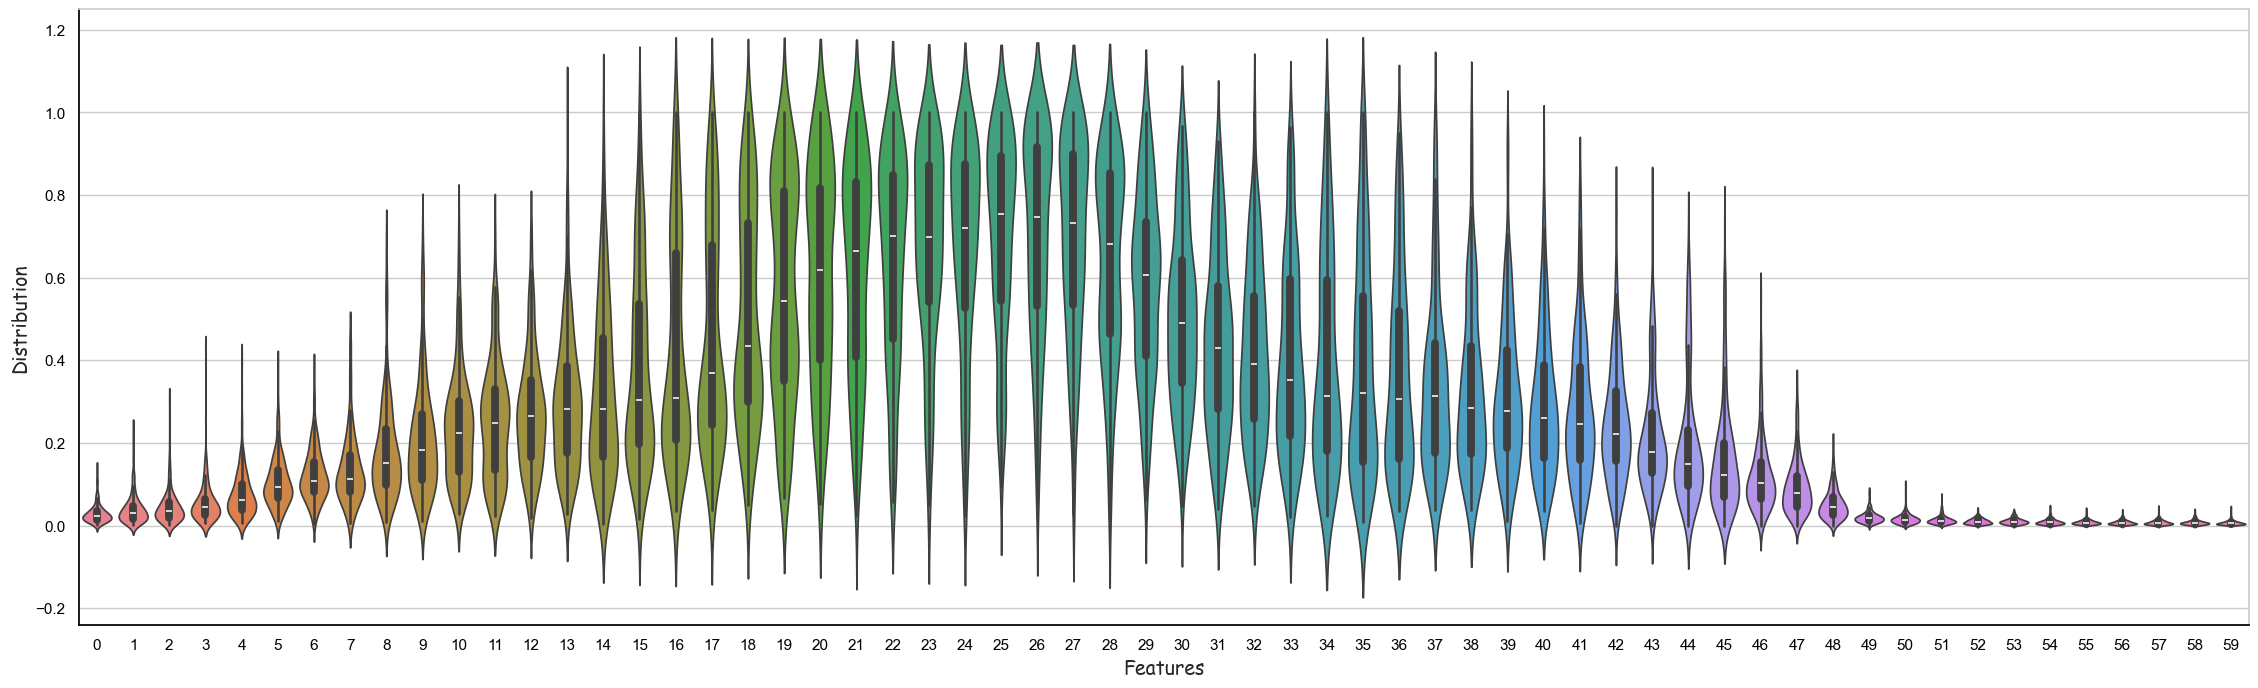

In [9]:
#Checking for Outliers and need for scaling
hfont = {'fontname':'Comic Sans MS'}
plt.figure(figsize=(28, 8))
sns.set(style='whitegrid')

ax = plt.gca()

vp = sns.violinplot(data=_sd.drop(columns=60, axis=1))

ax.set_xlabel('Features', fontsize=14,**hfont)
ax.set_ylabel('Distribution', fontsize=14,**hfont)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


plt.show()


# Splitting Data

In [10]:
X = _sd.drop(columns=60, axis=1)
y = _sd[60]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Models

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(),
    "Naïve Bayes": GaussianNB()
}

# Evaluating the Models

In [41]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

[LightGBM] [Info] Number of positive: 81, number of negative: 85
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487952 -> initscore=-0.048202
[LightGBM] [Info] Start training from score -0.048202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [89]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Recall,Precision,F1 Score,Confusion Matrix
Logistic Regression,0.785714,0.785714,0.814059,0.788795,"[[19, 7], [2, 14]]"
k-NN,0.857143,0.857143,0.876623,0.859127,"[[21, 5], [1, 15]]"
SVM,0.833333,0.833333,0.845919,0.835374,"[[21, 5], [2, 14]]"
Decision Tree,0.690476,0.690476,0.736624,0.69418,"[[16, 10], [3, 13]]"
Random Forest,0.833333,0.833333,0.845919,0.835374,"[[21, 5], [2, 14]]"
XGBoost,0.809524,0.809524,0.829437,0.812169,"[[20, 6], [2, 14]]"
LightGBM,0.833333,0.833333,0.861678,0.835729,"[[20, 6], [1, 15]]"
Naïve Bayes,0.738095,0.738095,0.811204,0.739432,"[[16, 10], [1, 15]]"


In [56]:
r = results_df.drop('Confusion Matrix',axis=1)
r = r.astype("float")
r.index.name="ML"
r

,Accuracy,Recall,Precision,F1 Score
ML,,,,
Logistic Regression,0.785714,0.785714,0.814059,0.788795
k-NN,0.857143,0.857143,0.876623,0.859127
SVM,0.833333,0.833333,0.845919,0.835374
Decision Tree,0.690476,0.690476,0.736624,0.694180
Random Forest,0.833333,0.833333,0.845919,0.835374
XGBoost,0.809524,0.809524,0.829437,0.812169
LightGBM,0.833333,0.833333,0.861678,0.835729
Naïve Bayes,0.738095,0.738095,0.811204,0.739432


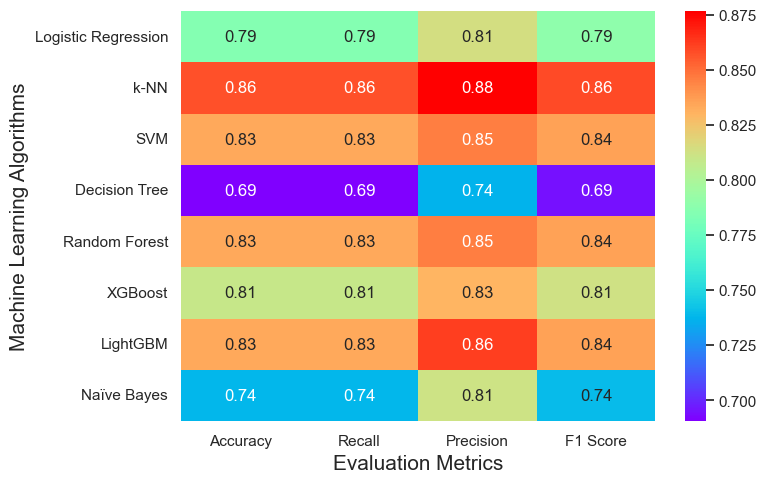

In [73]:
plt.figure(figsize=(8,5))
sns.heatmap(r,annot=True,cmap="rainbow")
plt.ylabel("Machine Learning Algorithms",fontsize=15)
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.tight_layout()
plt.show()

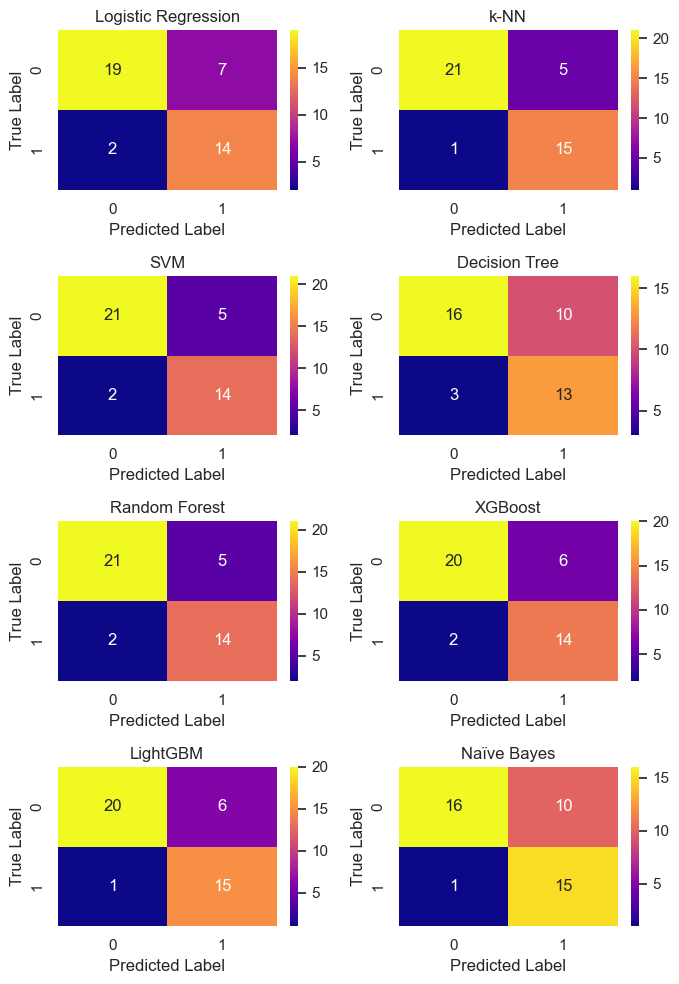

In [88]:
fig, axes = plt.subplots(4, 2, figsize=(7, 10))
axes = axes.flatten() 


for i, (model, cm) in enumerate(results_df['Confusion Matrix'].items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="plasma", ax=axes[i])
    axes[i].set_title(model)  
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()